In [101]:
import sys
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, make_scorer
from imblearn.over_sampling import RandomOverSampler
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering


#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sys.path.insert(0, '/Users/gracewang/Documents/GitHub/elecfinal')
sys.path.insert(0, 'D:\Fall23 Coursework\ELEC478\Competition\elecfinal')

In [102]:
from ml_pipeline import train_n_predict, validation, clean_split

In [103]:
from Data.data_cleaner import cleaner

In [104]:
## Clean data
train_path = "../Data/train_data.csv"
feature_path = "../Data/feature_weights.csv"
morph_path = "../Data/imputed_morph_embed.csv"
X_train, X_val, X_query, y_train, y_val, y_query = clean_split(train_path, feature_path, morph_path)

In [79]:
X_train.columns

Index(['ID', 'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'compartment', 'pre_brain_area',
       'post_brain_area', 'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z',
       'pre_nucleus_id', 'post_nucleus_id', 'pre_feature_weights',
       'post_feature_weights', 'pre_morph_embeddings', 'post_morph_embeddings',
       'me_similarity', 'fw_similarity', 'projection_group', 'axonal_coords',
       'dendritic_coords', 'pre_rf_coords', 'post_rf_coords',
       'pre_nucleus_coords', 'nuclei_adp_dist'],
      dtype='object')

# Select Feature Weights

In [105]:
feature_weights = pd.read_csv(feature_path)
X_train_fw = feature_weights.merge(X_train['pre_nucleus_id'], right_on ='pre_nucleus_id', left_on='nucleus_id')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

feature_counts = defaultdict(int)
for rep in range(50):
    model = RandomForestClassifier(n_estimators=500)

    model.fit(X_train_fw.drop(columns=['pre_nucleus_id', 'nucleus_id']), y_train)

    importances = model.feature_importances_
    imp_df = pd.DataFrame({"Features":X_train_fw.drop(columns=['pre_nucleus_id', 'nucleus_id']).columns, "Importance":importances})

    imp_df = imp_df.sort_values('Importance', ascending=False)
    for feature in imp_df['Features'][0:5]:
        feature_counts[feature]+=1

In [ ]:
feature_counts

In [106]:
keep_fw = feature_weights[["nucleus_id", "feature_weight_330", 'feature_weight_328']]
X_train = keep_fw.merge(X_train, left_on='nucleus_id', right_on='pre_nucleus_id')
X_train


,nucleus_id,feature_weight_330,feature_weight_328,ID,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,post_oracle,...,post_morph_embeddings,me_similarity,fw_similarity,projection_group,axonal_coords,dendritic_coords,pre_rf_coords,post_rf_coords,pre_nucleus_coords,nuclei_adp_dist
0,582129,-0.206426,0.211415,48656,-1.383514,1.328283,-0.607981,-1.553935,-0.362281,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",1.077231,-1.065146,AL->RL,"[1265270, 450597, 920661]","[1265640, 450398, 920262]","[855.0040316581726, 544.8585534095764]","[858.5207009315491, 608.4342455863953]","[1311616, 473664, 757880]",-0.348809
1,582129,-0.206426,0.211415,48657,-1.355662,1.538367,-0.673488,-1.553935,-0.362281,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",1.077231,-1.065146,AL->RL,"[1230790, 692832, 844011]","[1231270, 692894, 844399]","[855.0040316581726, 544.8585534095764]","[858.5207009315491, 608.4342455863953]","[1311616, 473664, 757880]",0.128893
2,582129,-0.206426,0.211415,48658,0.476569,2.996159,-0.845149,-1.553935,-0.362281,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",1.077231,-1.065146,AL->RL,"[1300030, 524790, 861672]","[1301040, 521794, 860782]","[855.0040316581726, 544.8585534095764]","[858.5207009315491, 608.4342455863953]","[1311616, 473664, 757880]",-0.682142
3,582129,-0.206426,0.211415,48659,0.896940,-0.705250,-0.631973,-1.553935,-0.362281,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",1.077231,-1.065146,AL->RL,"[1190930, 458724, 919590]","[1192510, 455252, 918028]","[855.0040316581726, 544.8585534095764]","[858.5207009315491, 608.4342455863953]","[1311616, 473664, 757880]",-0.156166
4,582129,-0.206426,0.211415,48660,1.110236,2.716134,-0.858720,-1.553935,-0.362281,1.191761,...,"[1.0723994970321655, -0.7540942430496216, 0.11...",1.077231,-1.065146,AL->RL,"[1280940, 662046, 800268]","[1282930, 660720, 803718]","[855.0040316581726, 544.8585534095764]","[858.5207009315491, 608.4342455863953]","[1311616, 473664, 757880]",-0.197845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118898,294858,-0.383717,-0.206139,224656,-1.153476,0.399766,-0.718692,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[815199, 840966, 936012]","[815423, 841222, 936912]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",0.523107
118899,294858,-0.383717,-0.206139,224657,-0.241583,-0.349050,-1.047622,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[781179, 711648, 913773]","[781156, 713918, 914591]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",-0.286781
118900,294858,-0.383717,-0.206139,224658,0.554607,-0.541337,-0.882155,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[792729, 700644, 853209]","[796175, 699876, 854748]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",-0.270014
118901,294858,-0.383717,-0.206139,224659,1.086661,-0.653431,-0.854285,0.577790,-0.460852,-0.024162,...,"[1.4674314260482788, 0.6272068619728088, 0.410...",0.278531,-0.033703,V1->V1,"[790671, 741048, 834960]","[789421, 744192, 837710]","[831.2186741828918, 560.7675075531006]","[894.7975826263428, 590.8018326759338]","[770240, 531136, 920360]",-0.002103


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

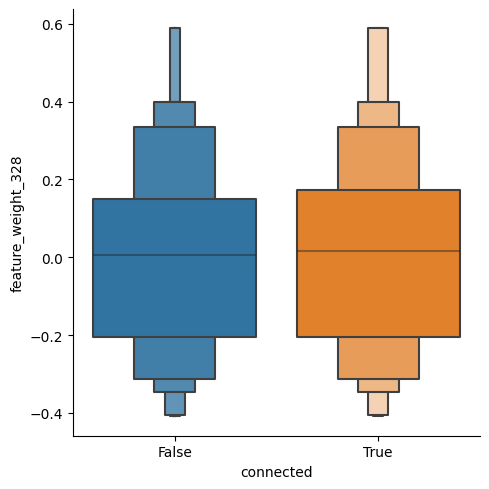

In [58]:
final = X_train
final['connected']=y_train
sns.catplot(x='connected', y='feature_weight_328', data=final, kind='boxen')

## One-Hot Encoding of Compartment

In [107]:
# different compartments
pd.unique(X_train["compartment"])

array(['axon', 'apical_tuft', 'basal', 'apical', 'oblique',
       'apical_shaft', 'soma'], dtype=object)

In [108]:
area1 = ["basal", "soma"]
area2 = ["axon", "apical", "oblique", "apical_shaft"]
area3 = ["apical_tuft"]

def area_cols(df):
    df["area1"] = df["compartment"].isin(area1).astype('int')
    df["area2"] = df["compartment"].isin(area2).astype('int')
    df["area3"] = df["compartment"].isin(area3).astype('int')
    return df


In [109]:
X_train = area_cols(X_train)
X_val = area_cols(X_val)
X_query = area_cols(X_query)

In [113]:
X_train['pre_brain_area']

0         AL
1         AL
2         AL
3         AL
4         AL
          ..
118898    V1
118899    V1
118900    V1
118901    V1
118902    V1
Name: pre_brain_area, Length: 118903, dtype: object

# One-Hot Encoding of all Categorical Features

In [114]:
def one_hot(column, df, suffix=''):
    """
    one-hot encodes this shit
    """
    cats = pd.unique(df[column])

    for cat in cats:
        new_col = cat+suffix
        df[new_col] = df[column]==cat
        df[new_col] = df[new_col].astype('int')
    
    df = df.drop(columns=column)
    return df

In [122]:
X_train_1hot = one_hot('pre_brain_area', X_train, '_pre')
X_train_1hot = one_hot('post_brain_area', X_train_1hot, '_post')
X_train_1hot = one_hot('projection_group', X_train_1hot)

In [123]:
X_train_1hot = X_train_1hot.drop(columns='compartment')

In [124]:
X_train_1hot.dtypes

nucleus_id                          int64
feature_weight_330                float64
feature_weight_328                float64
ID                                  int64
adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
post_oracle                       float64
post_test_score                   float64
post_nucleus_x                    float64
post_nucleus_y                    float64
post_nucleus_z                    float64
pre_nucleus_id                      int64
post_nucleus_id                     int64
pre_feature_weights                object
post_feature_weights               object
pre_morph_embeddings               object
post_morph_embeddings              object
me_similarity                     float64
fw_similarity                     float64
axonal_coords                      object
dendritic_coords                  

In [127]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict

feature_counts = defaultdict(int)
for rep in range(50):
    model = RandomForestClassifier(n_estimators=500)

    model.fit(X_train_1hot.select_dtypes('number').drop(columns=['ID', 'nucleus_id']), y_train)

    importances = model.feature_importances_
    imp_df = pd.DataFrame({"Features":X_train_1hot.select_dtypes('number').drop(columns=['ID', 'nucleus_id']).columns, "Importance":importances})

    imp_df = imp_df.sort_values('Importance', ascending=False)
    for feature in imp_df['Features'][0:5]:
        feature_counts[feature]+=1

In [128]:
feature_counts

defaultdict(int,
            {'adp_dist': 50,
             'pre_skeletal_distance_to_soma': 50,
             'nuclei_adp_dist': 50,
             'post_skeletal_distance_to_soma': 50,
             'fw_similarity': 46,
             'me_similarity': 4})

# Clustering
Create clusters?

In [ ]:
sns.scatterplot(x=X_train['post_nucleus_x'], y=X_train['post_nucleus_y'])

In [ ]:
clustering = SpectralClustering(n_clusters= 4, assign_labels='kmeans', affinity = 'nearest_neighbors').fit(X_train[["post_nucleus_x", "post_nucleus_y"]])
X_train["cluster"] = clustering.fit_predict(X_train[["post_nucleus_x", "post_nucleus_y"]])
sns.scatterplot(data=X_train, x="post_nucleus_x", y="post_nucleus_y", hue="cluster")

# Validation

In [125]:
X_val = keep_fw.merge(X_val, left_on='nucleus_id', right_on='pre_nucleus_id')

valid_X = X_val.select_dtypes(include='number').drop(["ID","pre_nucleus_id", "post_nucleus_id"], axis = 1)

valid_y = y_val

train_X = X_train.select_dtypes(include='number').drop(["ID", "pre_nucleus_id", "post_nucleus_id"], axis = 1)
train_y = y_train

In [126]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118903 entries, 0 to 118902
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   nucleus_id                      118903 non-null  int64  
 1   feature_weight_330              118903 non-null  float64
 2   feature_weight_328              118903 non-null  float64
 3   adp_dist                        118903 non-null  float64
 4   post_skeletal_distance_to_soma  118903 non-null  float64
 5   pre_skeletal_distance_to_soma   118903 non-null  float64
 6   pre_oracle                      118903 non-null  float64
 7   pre_test_score                  118903 non-null  float64
 8   post_oracle                     118903 non-null  float64
 9   post_test_score                 118903 non-null  float64
 10  post_nucleus_x                  118903 non-null  float64
 11  post_nucleus_y                  118903 non-null  float64
 12  post_nucleus_z  

# Neural Network (I am giving up)

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
import time
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [29]:
# oversample the data
ros = RandomOverSampler(random_state=0, sampling_strategy = 'minority')
X_trainr, y_trainr = ros.fit_resample(
        train_X, train_y)

In [31]:
def nnet_single(act_fun, p, X_train, y_train, X_val, y_val):
    """
    Function that constructs a single hidden layer neural network with p neurons using different activation functions

    Inputs:
        - act_fun: a string giving the name of the activation function to be used
        - p: the number of neurons in the neural network
        - X_train, y_train: training data
        - X_val, y_val: validation data
    
    Outputs:
        - model: the neural network model
        - train_time: the time needed to train the model
    """
    keras.utils.set_random_seed(12)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(p, activation=act_fun), # hidden layer
        tf.keras.layers.Dense(10, activation='softmax') # output class probabilities
    ])
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.005),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    st = time.time() # start timer

    model.fit(X_train, y_train, epochs=100, verbose=0) # fit the model to training data

    et = time.time() # end timer

    train_time = et-st # training time

    accuracy_res = round(model.evaluate(X_val, y_val, verbose=0)[1],3) # get the accuracy result
    
    print(model.metrics_names[1], "for", act_fun, "with p =", str(p), ":", str(accuracy_res)) # print the accuracy result

    return model, train_time

In [33]:
model, train_time = nnet_single("relu", 10, X_trainr, y_trainr, valid_X, valid_y)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 19, but received input with shape (None, 22)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 22), dtype=float64)
      • training=False
      • mask=None


# Validation for Hyperparameters

In [64]:
"""
    Function that outputs a model with optimal hyperparameters
    based on a validation set using grid search

    Inputs:
    model: provided model
    param_grid: dictionary of parameters and values to validate on
    e.g. 
    {'C': [0.001,0.01,0.1,1,10], 
    'gamma':[0.1,1,10,100], 
    'kernel':('linear', 'rbf')}
    valid_X: validation X of data (pandas df)
    valid_y: validation y of data

    Outputs: 
    clf: provided model with optimum hyperparameters
    """
pre_valid_models = [LinearDiscriminantAnalysis()]
param_grids = [
    {
    'solver' : ['lsqr', 'eigen', 'svd'],
    'shrinkage' : ['auto']
    }]
post_valid_models = []

for i in range(len(pre_valid_models)):
    best_clf = validation(model = pre_valid_models[i], 
                                        param_grid = param_grids[i], 
                                        valid_X = train_X, 
                                        valid_y = train_y)
    post_valid_models.append(best_clf)


(Alternative validation) USING ALL SVDs

In [ ]:
pre_valid_models = [SVC()]
param_grids = [
    {
    'kernel':['rbf'],
    'C': [0.1, 1],
    }]
post_valid_models = []

for i in range(len(pre_valid_models)):
    best_clf = validation(model = pre_valid_models[i], 
                                        param_grid = param_grids[i], 
                                        valid_X = valid_X, 
                                        valid_y = valid_y)
    post_valid_models.append(best_clf)

In [74]:
post_valid_models[0].get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': 'auto',
 'solver': 'lsqr',
 'store_covariance': False,
 'tol': 0.0001}

# Training and Predicting

In [65]:

query_X = X_query.select_dtypes(include='number').drop(["ID", "pre_nucleus_id", "post_nucleus_id"], axis = 1)
query_y = y_query


In [66]:
"""
    Function that takes in a dataframe of data and outputs 
    a fitted "optimal" model

    Inputs:
    - train: training set
    - query: query set
    - models: dictionary of (model_name : model function) to train and predict on, with optimized 
    parameters already.

    Outputs:
    - best_clf: The optimum classifier function fitted over training data

    - accuracy_score: list of accuracies based on order of models
    passed.
    """
##Change this according to the models you passed for validation
models = {"LDA": post_valid_models[0]}
accuracy_score, best_clf, trained_models = train_n_predict(train_X, train_y, query_X, query_y, models)

In [ ]:
trained_models["LDA"].save_weights('top_submission_rfc')

In [67]:
print("The accuracies are", accuracy_score)

The accuracies are {'LDA': 0.7471878711660729}


In [68]:
leaderboard_path = "../Data/leaderboard_data.csv"
sub_data = cleaner(leaderboard_path, feature_path, morph_path, submission = True)
sub_data = area_cols(sub_data)
sub_data = keep_fw.merge(sub_data, left_on='nucleus_id', right_on='pre_nucleus_id')

sub_data.columns

Index(['nucleus_id', 'feature_weight_330', 'feature_weight_328', 'ID',
       'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'compartment', 'pre_brain_area',
       'post_brain_area', 'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z',
       'pre_nucleus_id', 'post_nucleus_id', 'pre_feature_weights',
       'post_feature_weights', 'pre_morph_embeddings', 'post_morph_embeddings',
       'me_similarity', 'fw_similarity', 'projection_group', 'axonal_coords',
       'dendritic_coords', 'pre_rf_coords', 'post_rf_coords',
       'pre_nucleus_coords', 'nuclei_adp_dist', 'area1', 'area2', 'area3'],
      dtype='object')

In [69]:
lb_data = sub_data.select_dtypes(include='number').drop(["pre_nucleus_id", "post_nucleus_id"], axis = 1)
lb_data.columns

Index(['nucleus_id', 'feature_weight_330', 'feature_weight_328', 'ID',
       'adp_dist', 'post_skeletal_distance_to_soma',
       'pre_skeletal_distance_to_soma', 'pre_oracle', 'pre_test_score',
       'post_oracle', 'post_test_score', 'post_nucleus_x', 'post_nucleus_y',
       'post_nucleus_z', 'me_similarity', 'fw_similarity', 'nuclei_adp_dist',
       'area1', 'area2', 'area3'],
      dtype='object')

In [70]:
#create a boolean prediction solution
lb_data["connected"] = trained_models["LDA"].predict(lb_data.drop("ID", axis = 1))

In [71]:
submission_data = lb_data.filter(['ID','connected'])

In [72]:
submission_data.to_csv('submission_data.csv',index=False)